In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import graphviz
import pydotplus

In [103]:
!pip install graphviz

     ---------------------------------------- 47.0/47.0 kB 1.2 MB/s eta 0:00:00


In [3]:
data=pd.read_csv('C:/Users/karthik/Documents/mlproject/healthcare/healthcare.csv')

In [4]:
data.head(5)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
data.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
data['bmi'] = data['bmi'].fillna(data['bmi']).mean()

In [9]:
data.shape


(5110, 12)

In [10]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
label_encoder = LabelEncoder()
columns_to_encode = ['gender', 'ever_married', 'work_type','Residence_type','smoking_status']
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

In [12]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,28.893237,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,28.893237,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,28.893237,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,28.893237,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,28.893237,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,28.893237,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,28.893237,1,0


chance of having stroke      : 249
chance of not having stroke : 4861


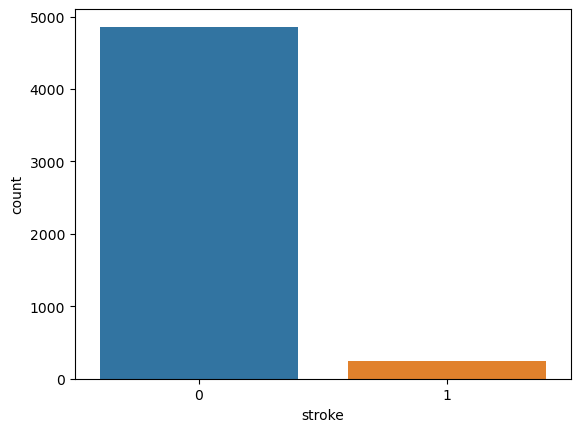

In [13]:
print("chance of having stroke      :", data['stroke'].value_counts()[1])
print("chance of not having stroke :", data['stroke'].value_counts()[0])
sns.countplot(x="stroke",data=data)
plt.show()

In [28]:
dataset = data
dataset = dataset.drop('bmi',axis=1)

In [29]:
corr=dataset.corr()
corr.shape

(11, 11)

<Axes: >

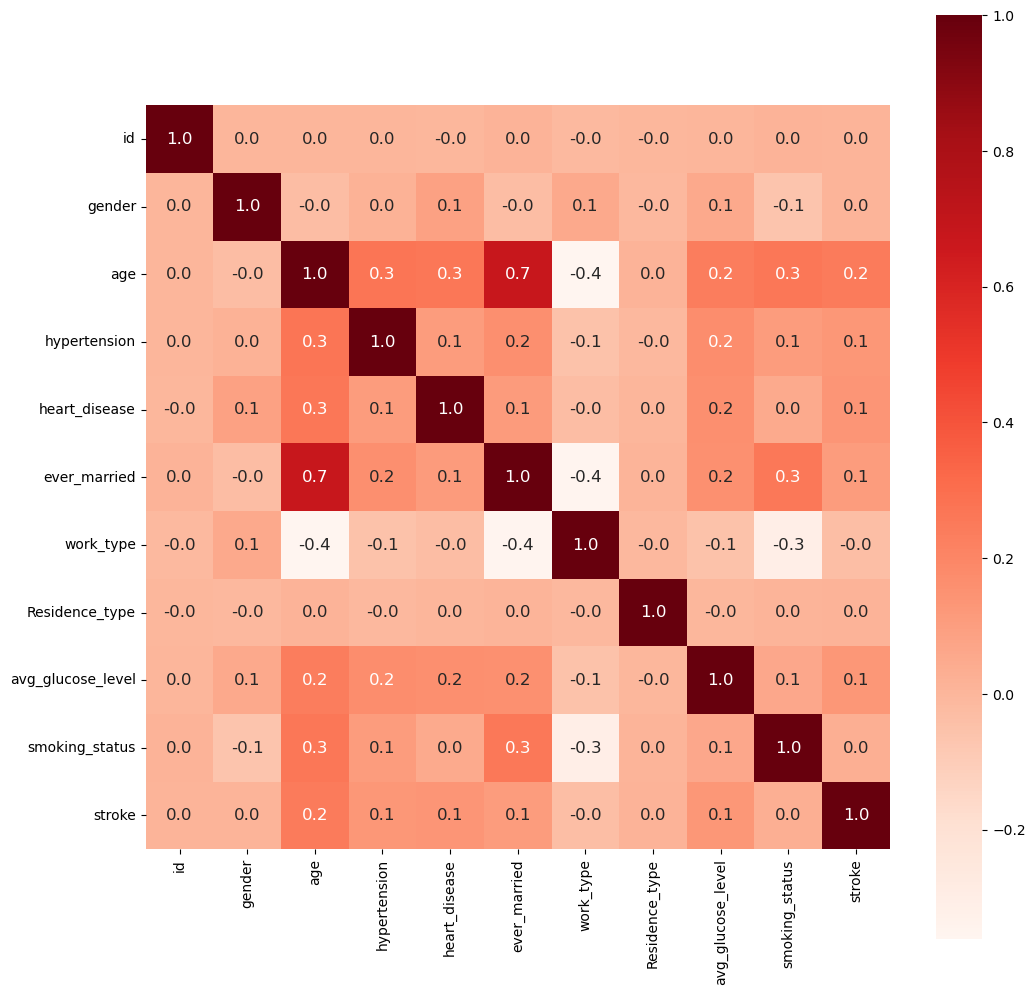

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':12}, cmap='Reds')

In [93]:
from sklearn.model_selection import train_test_split

X = data.drop("stroke",axis=1)
Y = data["stroke"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [94]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [95]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 92.07 %


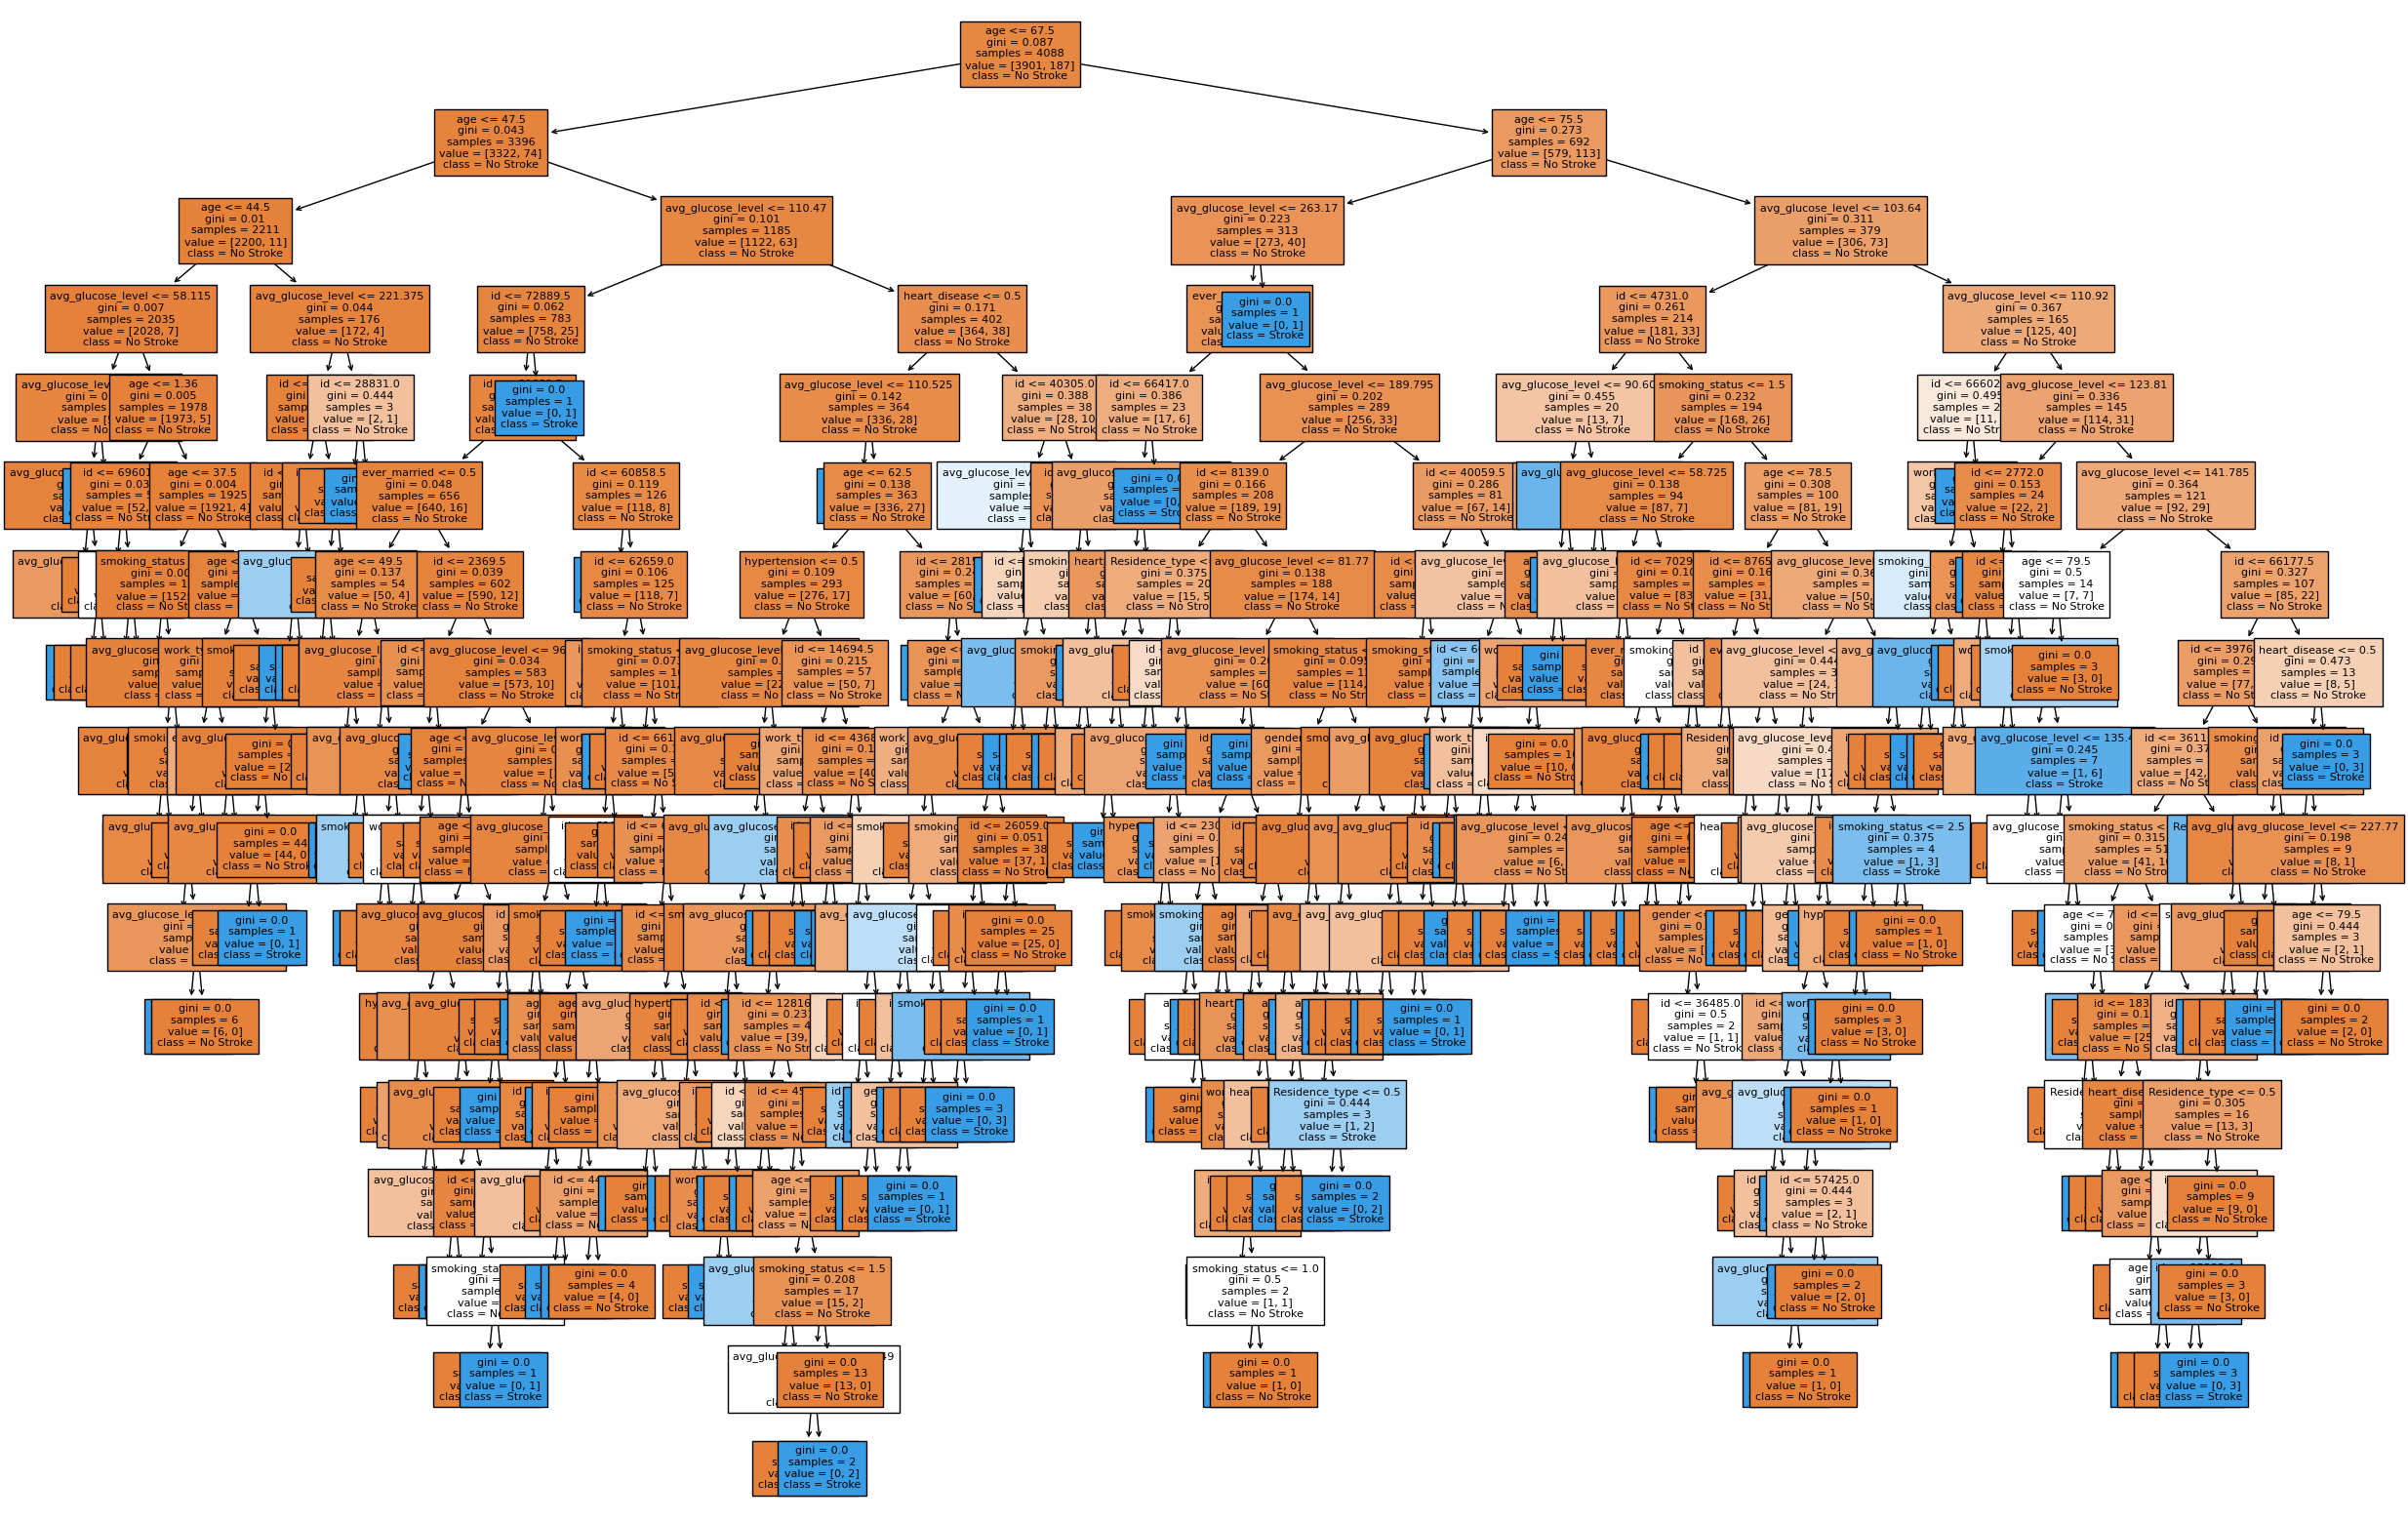

In [119]:
# Step 4: Visualize the decision tree
fig = plt.figure(figsize=(30, 20))
_ = tree.plot_tree(dt, feature_names=X.columns.tolist(), class_names=['No Stroke', 'Stroke'], filled=True, fontsize=8)

plt.show()